In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('olympics.xlsx', skiprows=1)

In [3]:
df.head()

,Unnamed: 0,# Summer,01 !,02 !,03 !,Total,# Winter,01 !.1,02 !.1,03 !.1,Total.1,# Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [4]:
df.rename(columns={'Unnamed: 0': 'Country',
                   '01 !':'Gold_Summer' ,
                   '02 !':'Silver_Summer',
                   '03 !':'Bronze_Summer',
                   'Total':'Total_Summer', 
                   '01 !.1': 'Gold_Winter',
                   '02 !.1': 'Silver_Winter' ,
                   '03 !.1' : 'Bronze_Winter',
                   'Total.1':'Total_Winter',
                   '01 !.2' :'Gold_Total',
                   '02 !.2': 'Silver_Total',
                   '03 !.2':'Bronze_Total',
                   'Combined total' :'Total'
                  },inplace=True)

In [5]:
df.head()

,Country,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [6]:
df['Country name'] = (df['Country'].str.split('(',1).str)[0].str.strip()

In [7]:
def remove_country_name(input_value):
    return input_value.split('(')[0].strip()

In [8]:
df['Country name'] = df.Country.apply(remove_country_name)

In [9]:
def create_better_event(inp):
    ts, tw = inp
    if ts > tw:
        return 'Summer'
    if ts < tw:
        return 'Winter'
    else:
        return 'Both'

In [10]:
df['BetterEvent'] = df[['Total_Summer','Total_Winter']].apply(create_better_event, axis = 1)

In [11]:
df_new = df.iloc[:len(df)-1,:]

In [12]:
topSummers = list(df_new.nlargest(10,'Total_Summer')['Country name'])
topSummers

[u'United States',
 u'Soviet Union',
 u'Great Britain',
 u'France',
 u'Germany',
 u'Italy',
 u'Sweden',
 u'Hungary',
 u'China',
 u'Australia']

In [13]:
topWinter = list(df_new.nlargest(10,'Total_Winter')['Country name'])
topWinter

[u'Norway',
 u'United States',
 u'Austria',
 u'Germany',
 u'Soviet Union',
 u'Canada',
 u'Finland',
 u'Sweden',
 u'Switzerland',
 u'Russia']

In [14]:
topTotal = list(df_new.nlargest(10,'Total')['Country name'])
topTotal

[u'United States',
 u'Soviet Union',
 u'Great Britain',
 u'Germany',
 u'France',
 u'Italy',
 u'Sweden',
 u'China',
 u'East Germany',
 u'Russia']

In [15]:
common = list(set(topSummers).intersection(set(topWinter),set(topTotal)))
common

[u'United States', u'Sweden', u'Germany', u'Soviet Union']

In [16]:
dftopsummer =df.loc[df['Country name'].isin(topSummers)]   
dfTop10Winter =df.loc[df['Country name'].isin(topWinter)]   
dfCommon =df.loc[df['Country name'].isin(topTotal)]

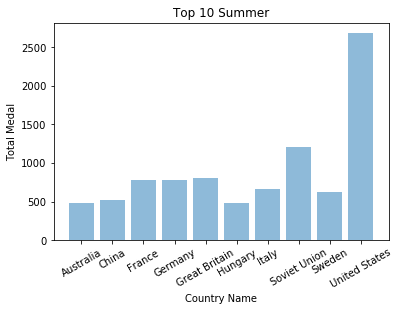

In [17]:
index = np.arange(dftopsummer.shape[0])
plt.bar(index, dftopsummer['Total'],align='center', alpha=0.5)
plt.ylabel('Total Medal')
plt.xlabel('Country Name')
plt.xticks(index,dftopsummer['Country name'], rotation=30)
plt.title('Top 10 Summer') 
plt.show()

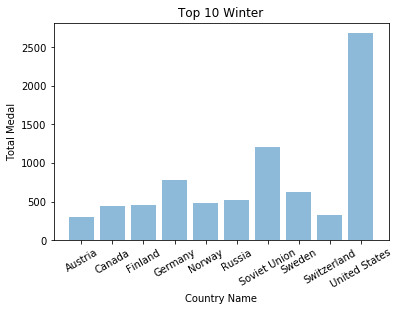

In [18]:
plt.bar(index, dfTop10Winter['Total'],align='center', alpha=0.5)
plt.ylabel('Total Medal')
plt.xlabel('Country Name')
plt.title('Top 10 Winter')
plt.xticks(index,dfTop10Winter['Country name'], rotation=30)
plt.show()

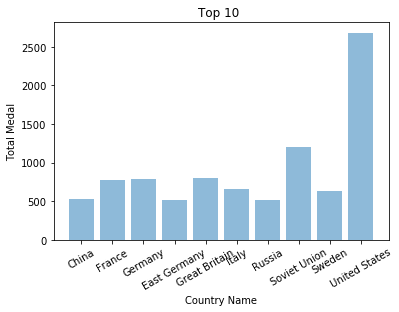

In [19]:
plt.bar(index, dfCommon['Total'],align='center', alpha=0.5)
plt.ylabel('Total Medal')
plt.xlabel('Country Name')
plt.title('Top 10 ')
plt.xticks(index,dfCommon['Country name'], rotation=30)
plt.show()

In [20]:
dfCommon['Ratio_Total'] = dfCommon.loc[:,'Gold_Total']/dfCommon.loc[:,'Total']
dfTop10Winter['Ratio_Total'] = dfTop10Winter.loc[:,'Gold_Total']/dfTop10Winter.loc[:,'Total']
dftopsummer['Ratio_Total'] = dftopsummer.loc[:,'Gold_Total']/dftopsummer.loc[:,'Total']

/home/bhavesh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/bhavesh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bhavesh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [21]:
total = list(dfCommon[dfCommon['Ratio_Total']==dfCommon['Ratio_Total'].max()]['Country name'])[0]
total_winter = list(dfTop10Winter[dfTop10Winter['Ratio_Total']==dfTop10Winter['Ratio_Total'].max()]['Country name'])[0]
total_summer = list(dftopsummer[dftopsummer['Ratio_Total']==dftopsummer['Ratio_Total'].max()]['Country name'])[0]

In [22]:
print total
print total_summer
print total_winter

China
China
United States


In [23]:
def unusual_performances(df, low, high):
    low_value, high_value = df['Total'].quantile([low, high])
    low_dataframe = df.iloc[np.where(df['Total'] <= low_value)]
    low_countries= low_dataframe['Country name']
    
    high_dataframe = df.iloc[np.where(df['Total'] > high_value)]
    high_countries = high_dataframe['Country name']    
    return low_countries, high_countries

In [24]:
low = 0.05
high = 0.95
low_count, high_count = unusual_performances(df_new, low, high)

In [25]:
print list(low_count)

[u'Bahrain', u'Barbados', u'Bermuda', u'Botswana', u'Burundi', u'Ivory Coast', u'Cyprus', u'Djibouti', u'Eritrea', u'Gabon', u'Grenada', u'Guatemala', u'Guyana', u'Iraq', u'Macedonia', u'Mauritius', u'Montenegro', u'Netherlands Antilles', u'Niger', u'Paraguay', u'Senegal', u'Sudan', u'Togo', u'Tonga', u'United Arab Emirates', u'Virgin Islands']


In [26]:
print list(high_count)

[u'China', u'France', u'Germany', u'Great Britain', u'Italy', u'Soviet Union', u'Sweden', u'United States']
